In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Left Join city_data to ride_data
pyber_data_df = pd.merge(ride_data_df,city_data_df,how='left',left_on=['city'],right_on=['city'])
#pyber_data_df.head()

In [5]:
# Caculation of required stats
ride_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
driver_by_type = city_data_df.groupby(['type']).sum()['driver_count']
totalfare_by_type = pyber_data_df.groupby(['type']).sum()['fare']
avefare_by_type = pyber_data_df.groupby(['type']).mean()['fare']
avefare_by_driver = totalfare_by_type / driver_by_type

In [6]:
# Summary DataFrame
PyBer_Summary_df = pd.DataFrame({
    "Total Rides":ride_by_type,
    "Total Drivers":driver_by_type,
    "Total Fares":totalfare_by_type,
    "Ave. Fare per Ride":avefare_by_type,
    "Ave. Fare per Driver":avefare_by_driver
})

# Removing Index Name
PyBer_Summary_df.index.name = None

# Formatting
PyBer_Summary_df['Total Rides'] = PyBer_Summary_df['Total Rides'].map("{:,.0f}".format)
PyBer_Summary_df['Total Drivers'] = PyBer_Summary_df['Total Drivers'].map("{:,.0f}".format)
PyBer_Summary_df['Total Fares'] = PyBer_Summary_df['Total Fares'].map("${:,.2f}".format)
PyBer_Summary_df['Ave. Fare per Ride'] = PyBer_Summary_df['Ave. Fare per Ride'].map("${:.2f}".format)
PyBer_Summary_df['Ave. Fare per Driver'] = PyBer_Summary_df['Ave. Fare per Driver'].map("${:.2f}".format)
PyBer_Summary_df

,Total Rides,Total Drivers,Total Fares,Ave. Fare per Ride,Ave. Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [7]:
pyber_data_df = pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
#pyber_data_df.head()

In [8]:
# New DataFrame for creating monthly chart
fare_by_date_df = pyber_data_df.copy()[['Date','City Type','Fare']]
fare_by_date_df.set_index(['Date'], inplace=True)
fare_by_date_df.index = fare_by_date_df.index.astype('datetime64[ns]')
#fare_by_date_df.info()

In [9]:
# Pivoting by City Type
graph = pd.pivot_table(fare_by_date_df,index='Date'
                       ,columns=['City Type'],values='Fare'
                       ,aggfunc=np.sum)

In [10]:
# Excluding incomplete month
graph = graph.loc[(graph.index >= '2019-01-01') & (graph.index <= '2019-04-28')]

# Calculating Weekly Fare
graph = graph.resample('W').sum()
#graph

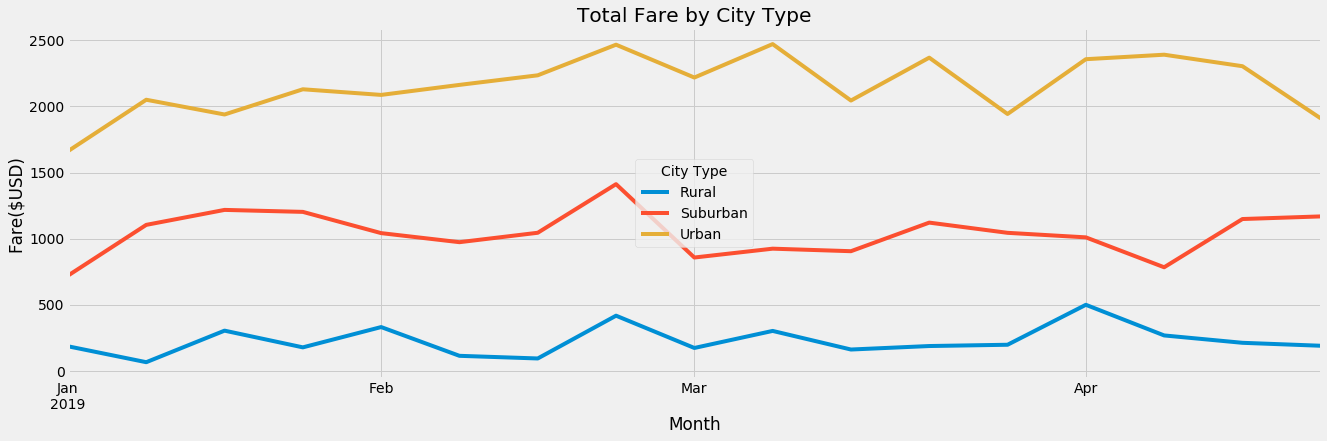

In [11]:
# Creating Line Chart for weekly fare
from matplotlib import style 
style.use('fivethirtyeight')
ax = graph.plot(figsize = (20, 6))
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Month")
ax.set_ylabel("Fare($USD)")
plt.savefig("Analysis/Challenge_LineChart.png")
plt.show()